In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
Data = pd.read_csv ('/Users/soroushesnaashari/cardata.csv', encoding='unicode_escape')
df = Data.copy()
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [53]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [54]:
df['Fuel_Type'].replace({'Petrol':2, 'Diesel':3, 'CNG':4}, inplace = True)
df['Seller_Type'].replace({'Dealer':2, 'Individual':3}, inplace = True)
df['Transmission'].replace({'Manual':2, 'Automatic':3}, inplace = True)

In [55]:
# Check for missing values
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [56]:
df['Year'].max()

2018

In [57]:
df = df.copy()
df['Year'] = 2019 - df['Year']
df = df.drop('Car_Name', axis = 1)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,2,2,2,0
1,6,4.75,9.54,43000,3,2,2,0
2,2,7.25,9.85,6900,2,2,2,0
3,8,2.85,4.15,5200,2,2,2,0
4,5,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,3,2,2,0
297,4,4.00,5.90,60000,2,2,2,0
298,10,3.35,11.00,87934,2,2,2,0
299,2,11.50,12.50,9000,3,2,2,0


In [58]:
# Display basic statistics
df.describe()    # Describe can not handle the "Object" Dtype columns

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,5.372093,4.661296,7.628472,36947.205980,2.212625,2.352159,2.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,1.000000,0.100000,0.320000,500.000000,2.000000,2.000000,2.000000,0.000000
25%,3.000000,0.900000,1.200000,15000.000000,2.000000,2.000000,2.000000,0.000000
50%,5.000000,3.600000,6.400000,32000.000000,2.000000,2.000000,2.000000,0.000000
75%,7.000000,6.000000,9.900000,48767.000000,2.000000,3.000000,2.000000,0.000000
max,16.000000,35.000000,92.600000,500000.000000,4.000000,3.000000,3.000000,3.000000


In [59]:
# Display dataset info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


# PreProcessing

### Year vs. Selling Price
Analyze how the car's manufacturing year impacts its resale value.

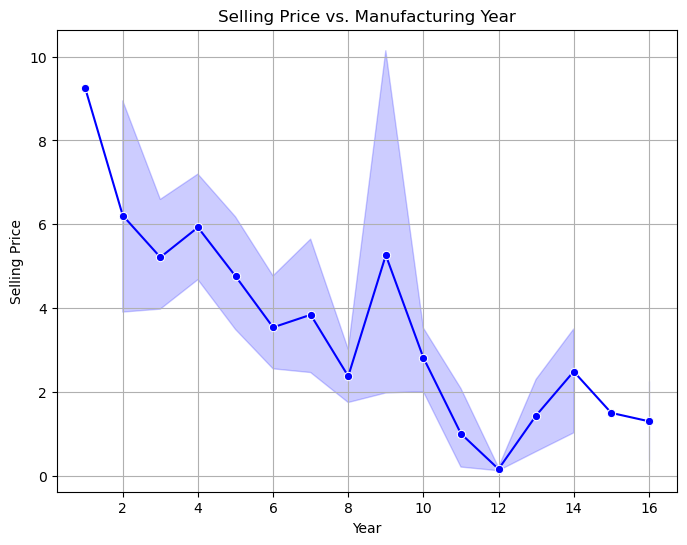

In [61]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='Selling_Price', data=df, marker='o', color='blue')
plt.title("Selling Price vs. Manufacturing Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

### Fuel Type Distribution
Understand the distribution of cars based on fuel type.

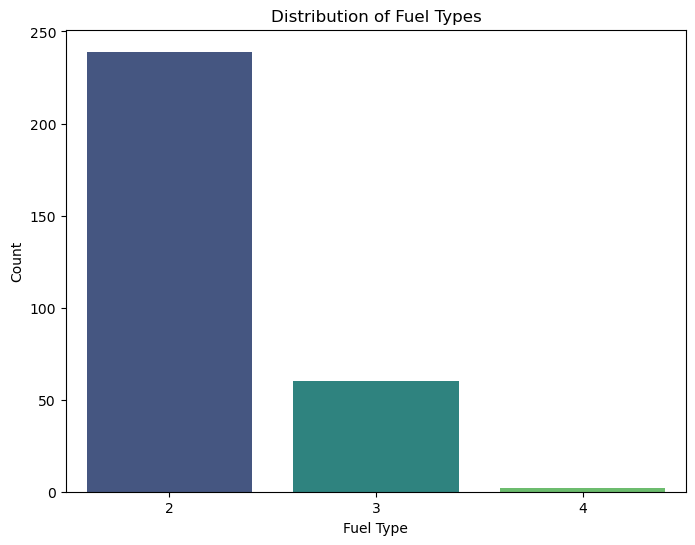

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel_Type', data=df, palette='viridis')
plt.title("Distribution of Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()
# Help
# Petrol: 2, Diesel: 3, CNG: 4

### Selling Price vs. Present Price
Examine the relationship between the current market price and selling price.

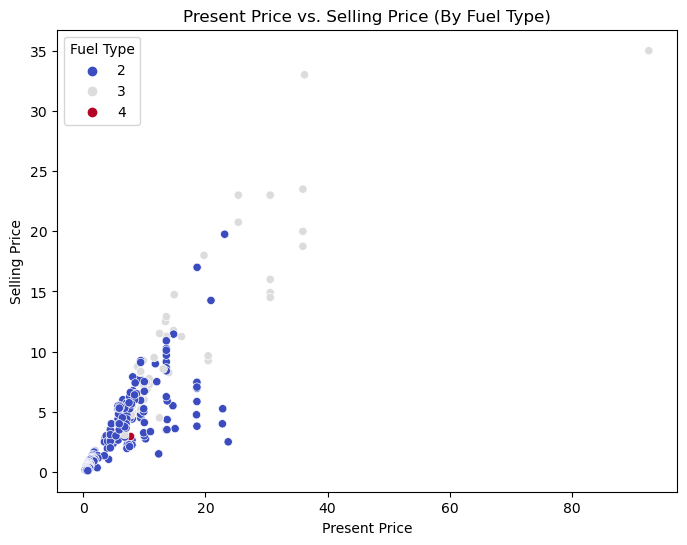

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', hue='Fuel_Type', data=df, palette='coolwarm')
plt.title("Present Price vs. Selling Price (By Fuel Type)")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.legend(title="Fuel Type")
plt.show()
# Hint
# Petrol: 2, Diesel: 3, CNG: 4

### Kms Driven vs. Selling Price
Assess how the mileage affects resale value.

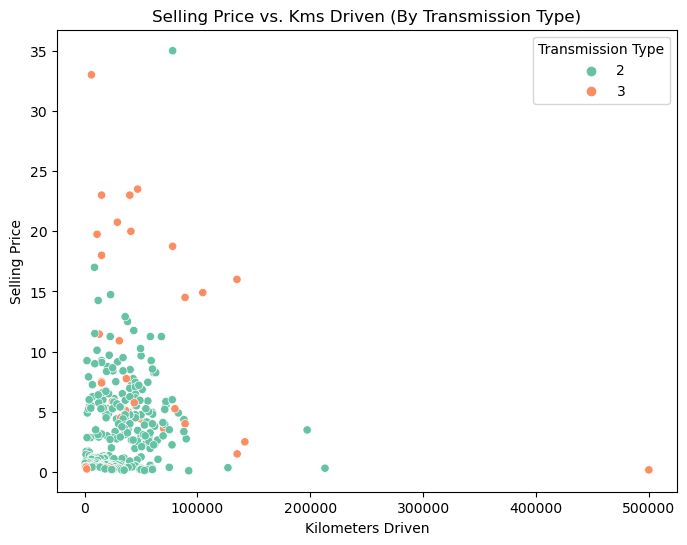

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', hue='Transmission', data=df, palette='Set2')
plt.title("Selling Price vs. Kms Driven (By Transmission Type)")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.legend(title="Transmission Type")
plt.show()
# Hint
# Manual: 2, Automatic: 3

### Owner Count Impact
Visualize the impact of the number of previous owners on selling price.

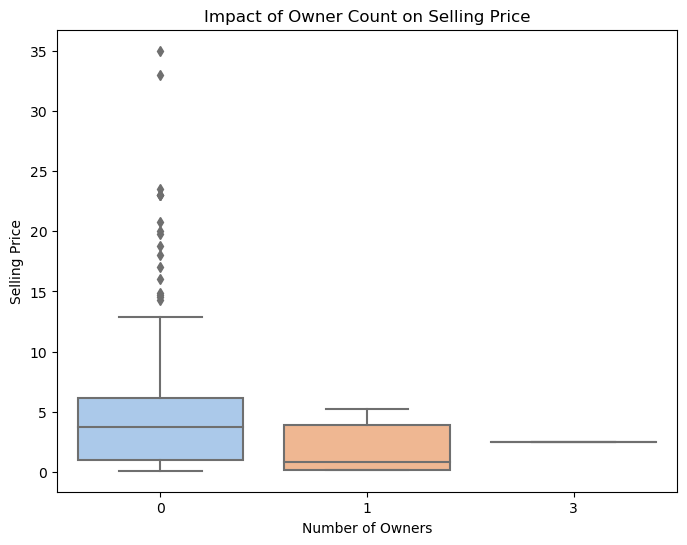

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Owner', y='Selling_Price', data=df, palette='pastel')
plt.title("Impact of Owner Count on Selling Price")
plt.xlabel("Number of Owners")
plt.ylabel("Selling Price")
plt.show()

### Seller Type Analysis
Compare the resale price for individual vs. dealer sellers.

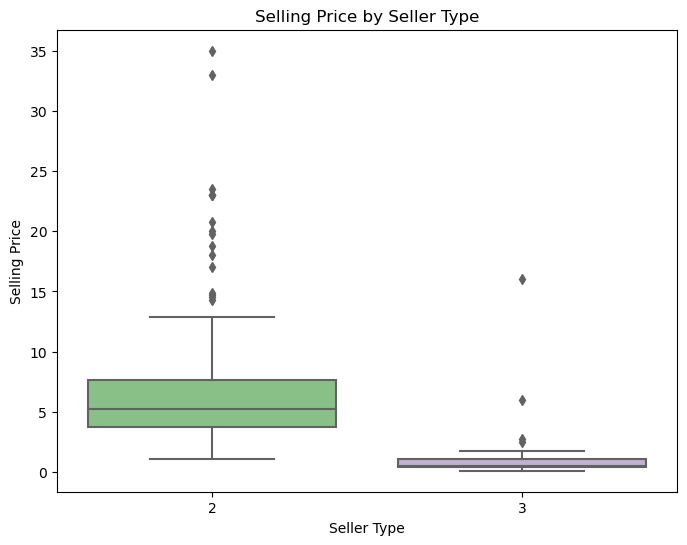

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df, palette='Accent')
plt.title("Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Selling Price")
plt.show()
# Hint
# Dealer: 2, Individual: 3

### Fuel Type vs. Selling Price
Compare the resale price across different fuel types.

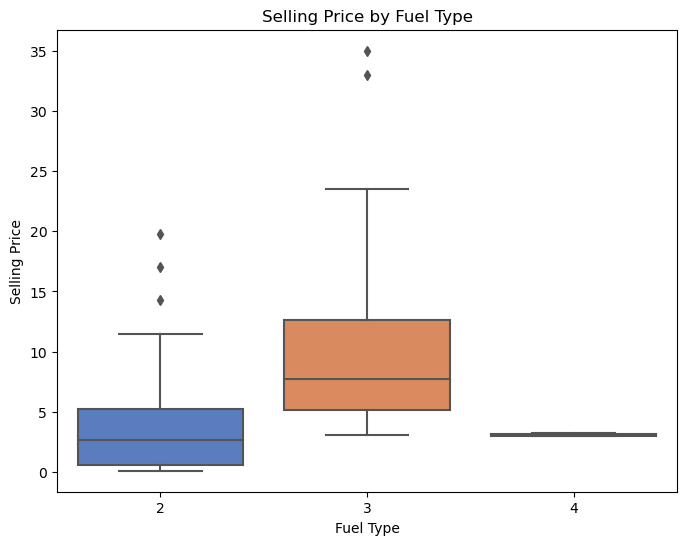

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='muted')
plt.title("Selling Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()
# Hint
# Petrol: 2, Diesel: 3, CNG: 4

### Transmission vs. Selling Price
Analyze how transmission type affects the resale value.

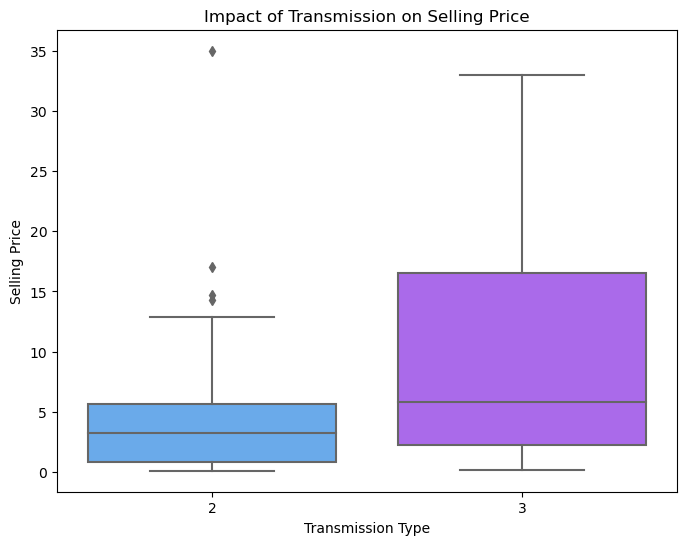

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df, palette='cool')
plt.title("Impact of Transmission on Selling Price")
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price")
plt.show()
# Hint
# Manual: 2, Automatic: 3

### Correlation Heatmap
Analyze the relationships between numerical features.

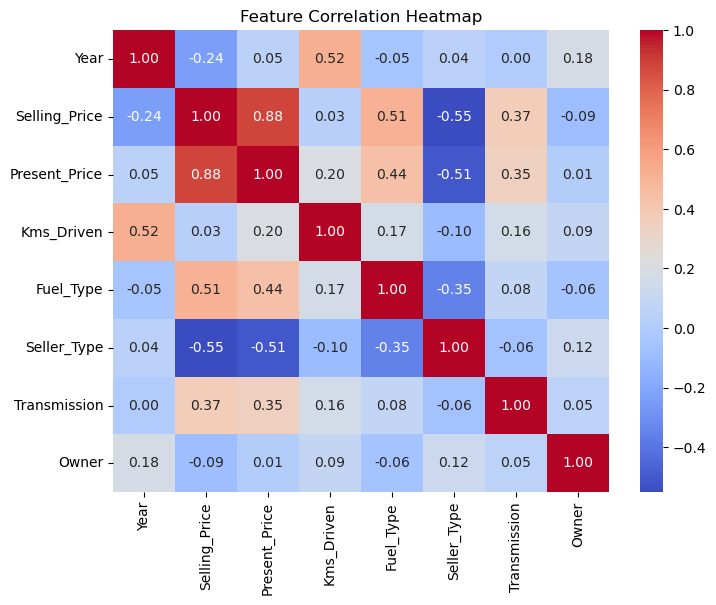

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
# Hint
# Petrol: 2, Diesel: 3, CNG: 4
# Dealer: 2, Individual: 3
# Manual: 2, Automatic: 3

### Relationship Between 3 Factors
Find out about the relationship between Car Age, amount of car usage and Selling Price  

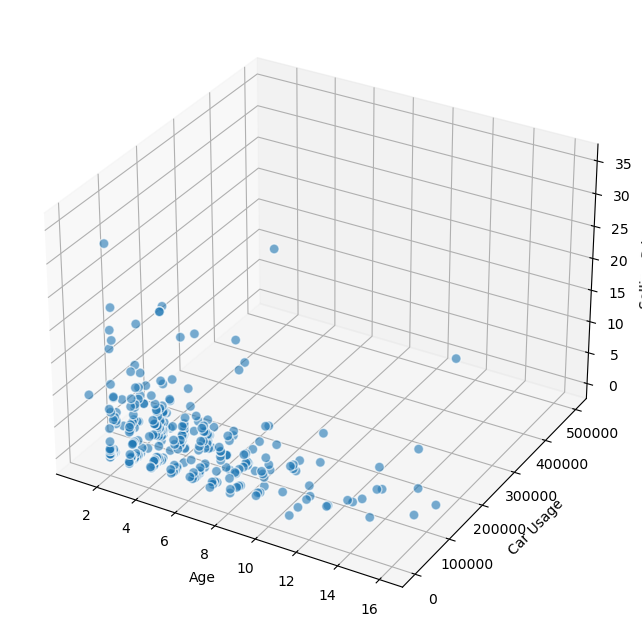

In [74]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Year']
ys = df['Kms_Driven']
zs = df['Selling_Price']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Car Usage')
ax.set_zlabel('Selling Price')

plt.show()

### Top Car Brands by Average Selling Price
Identify the car brands fetching the highest average resale price.

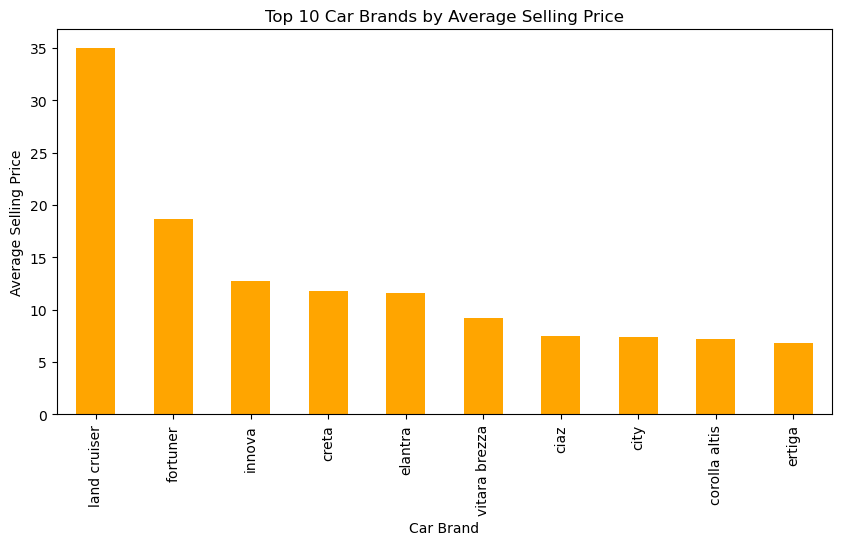

In [70]:
top_brands = Data.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title("Top 10 Car Brands by Average Selling Price")
plt.xlabel("Car Brand")
plt.ylabel("Average Selling Price")
plt.show()

### All Numerical Features
Visualize relationships across all numerical features.

/Users/soroushesnaashari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


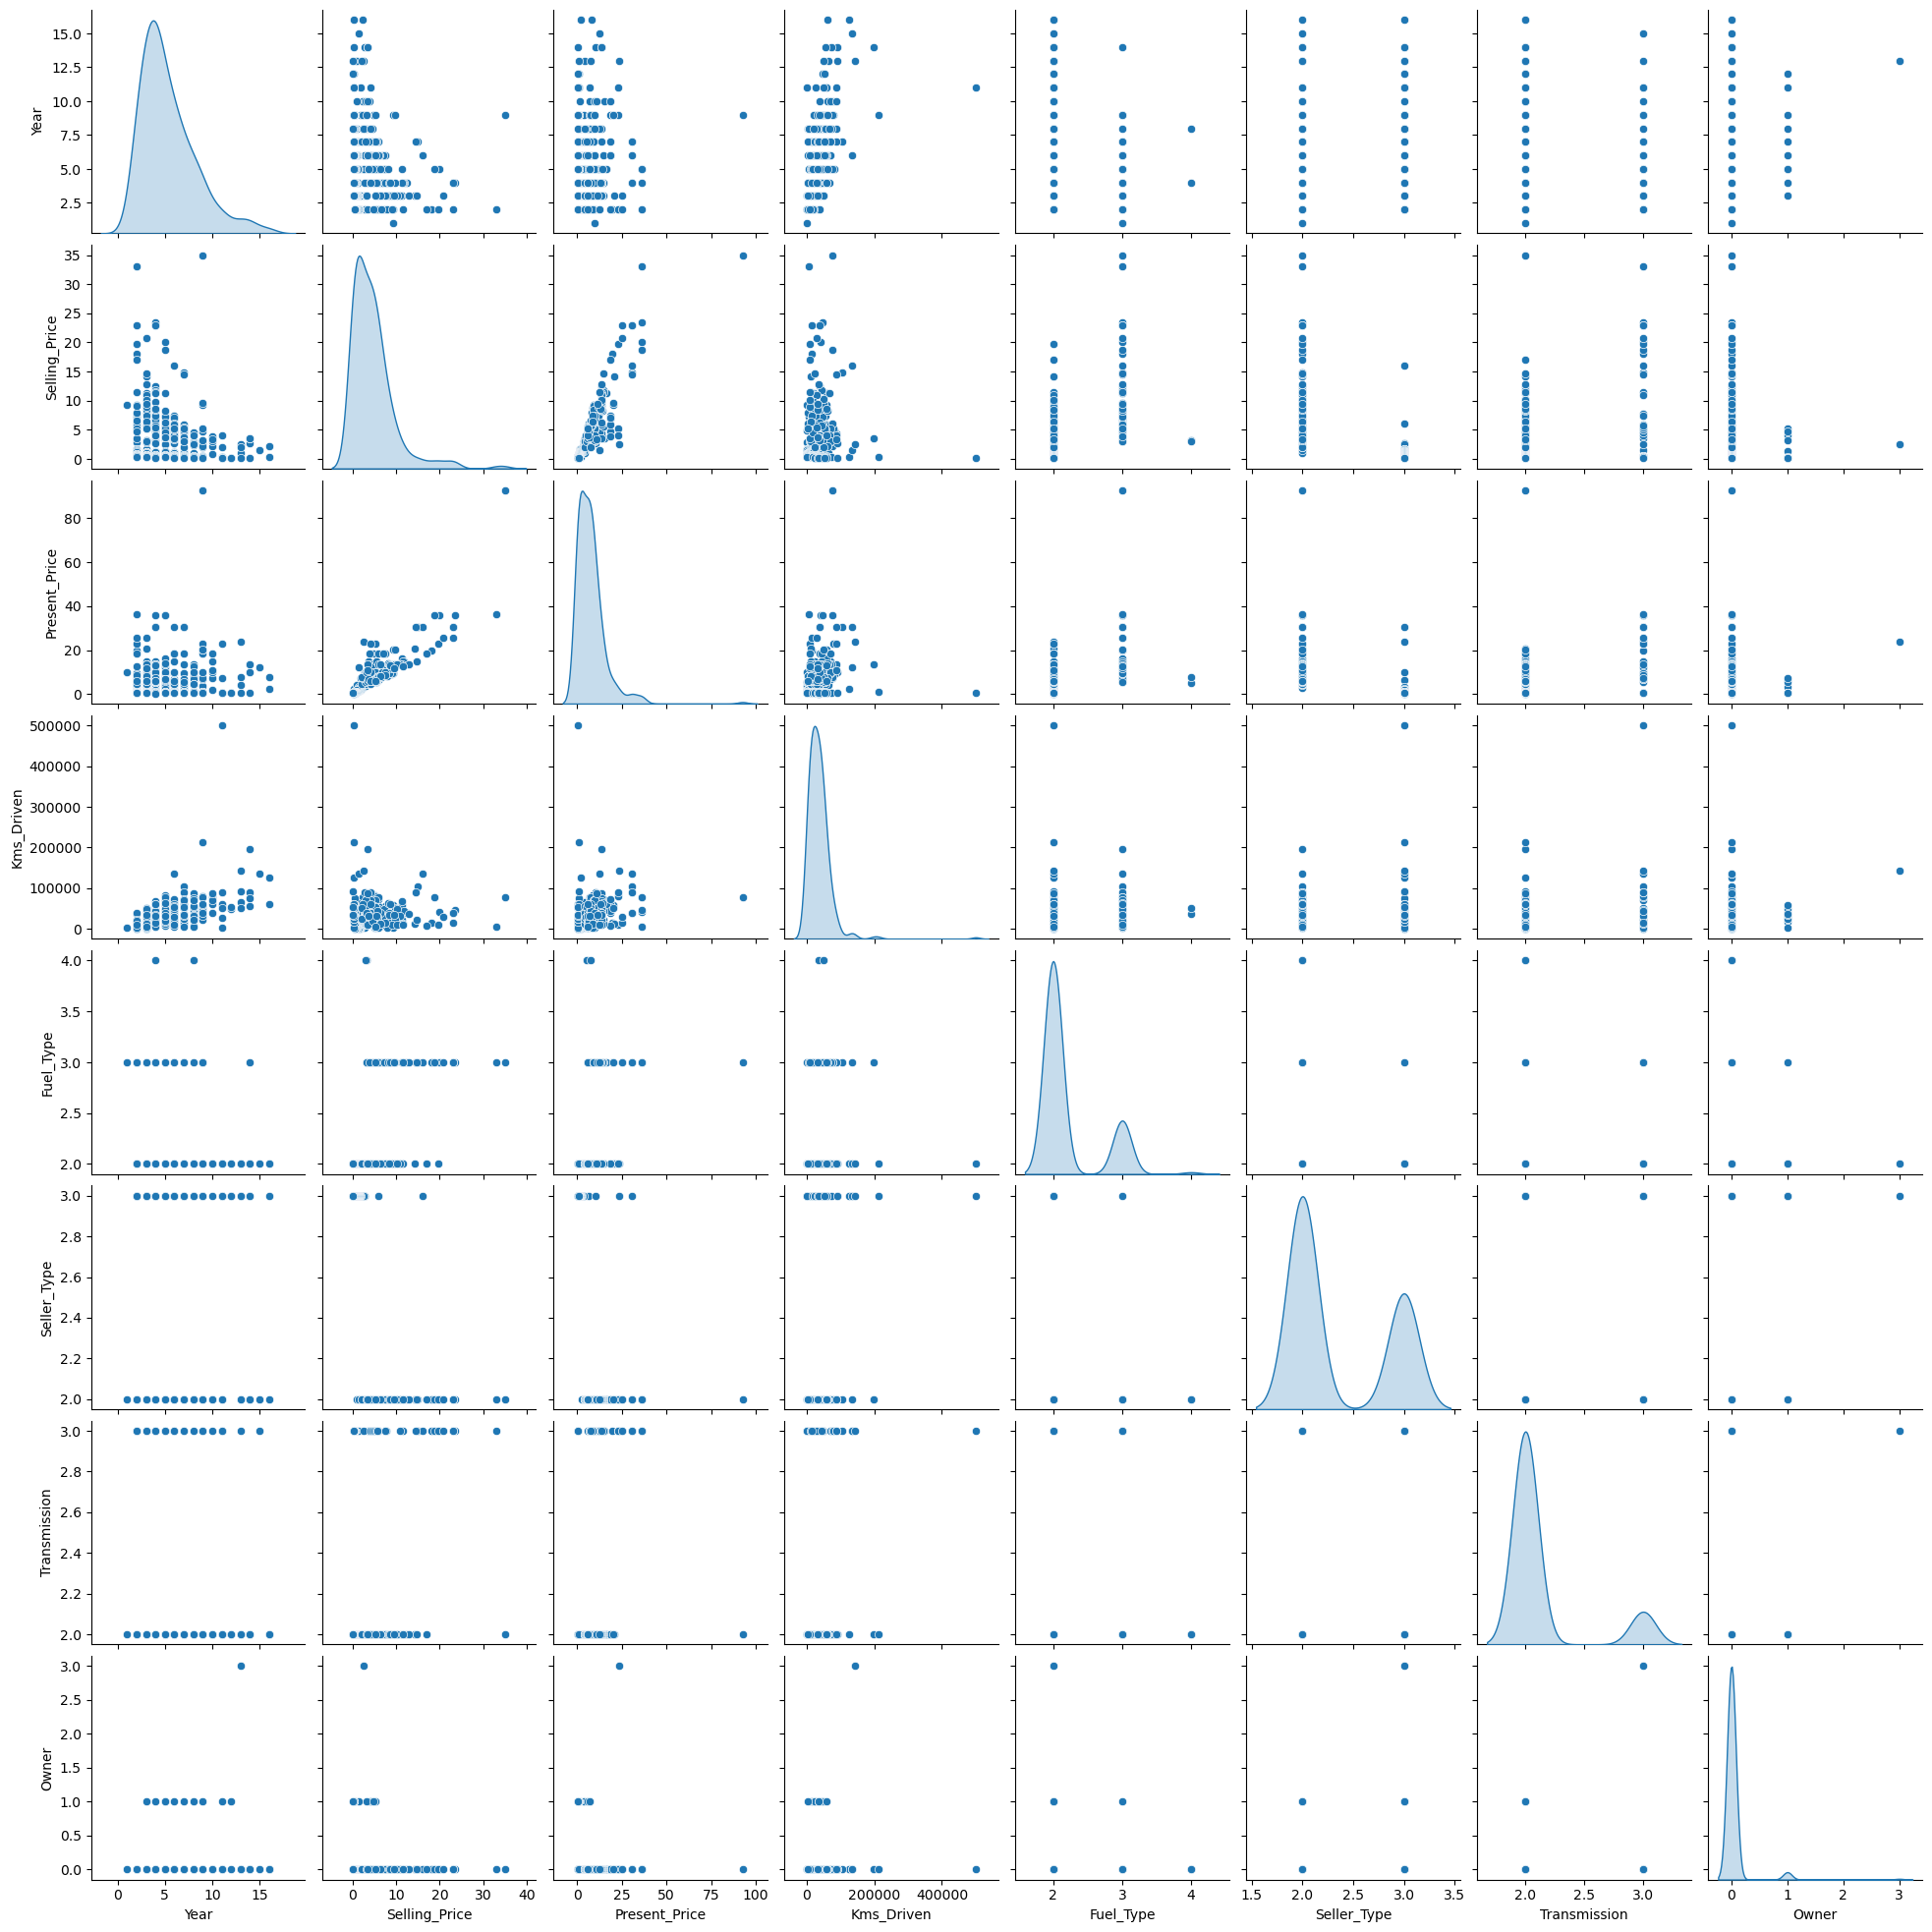

In [71]:
sns.pairplot(df, diag_kind='kde')
plt.show()
# Hint
# Petrol: 2, Diesel: 3, CNG: 4
# Dealer: 2, Individual: 3
# Manual: 2, Automatic: 3

---

# Spliting and Scaling

In [76]:
# Separate features and target variable
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [82]:
# Normalize the dataset using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

In [87]:
# Split the data into training and testing sets, with random_state=42, the result was a little bit weaker than 0
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

---

# Modeling

In [88]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
# Make predictions on the test set
y_pred = model.predict(X_test)

### Evaluating the model

In [92]:
# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Evaluation:")
print("Mean Absolute Error:", mae)    # The closer to 0, the better
print("Mean Squared Error:", mse)    # The closer to 0, the better
print("Root Mean Squared Error:", rmse)    # The closer to 0, the better
print("R2 Score:", r2)    # The closer to 1, the better


Linear Regression Model Evaluation:
Mean Absolute Error: 1.0000326012144796
Mean Squared Error: 2.188556445657237
Root Mean Squared Error: 1.479377046481808
R2 Score: 0.9134181721224686


### Finding the coefficients of each feature

In [94]:
# Extract the coefficients from the trained linear regression model
coefficients = pd.DataFrame({
    'Feature': df.drop(columns=['Selling_Price']).columns,    # Use feature names from the training data
    'Coefficient': model.coef_    # Coefficients from the trained model
}).sort_values(by='Coefficient', ascending=False)    # Sort by the coefficient value

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
         Feature  Coefficient
1  Present_Price    40.291292
3      Fuel_Type     2.887546
5   Transmission     1.438305
4    Seller_Type    -1.120770
2     Kms_Driven    -2.740179
6          Owner    -2.967668
0           Year    -5.888926


**So the Present Price has the most influence on our model**

In [95]:
print (model.intercept_)
print (model.coef_)

3.2545802557613106
[-5.88892594 40.29129177 -2.74017858  2.8875463  -1.12076998  1.43830531
 -2.96766797]


y = 3.25458025 + (5.88892594 . X1) + (40.29129177 . X2) + (-2.74017858 . X3) + (2.8875463 . X4) + (-1.12076998 . X5) + (1.43830531 . X6) + (-2.96766797 . X7)

---

# Testing the model

### Creating the test dataset

In [96]:
# Test data
test_data = {
    'Year': [8, 5, 1, 13, 6, 2, 12, 10, 10],
    'Selling_Price': [5, 6, 7, 8, 9, 10, 11, 12, 13],
    'Present_Price': [8.75, 10.35, 17.85, 25.25, 13.14, 10.00, 24.24, 18.85, 11.23],
    'Kms_Driven': [7000, 10000, 13000, 25000, 20000, 20000, 20000, 85000, 42000],
    'Fuel_Type': ['Petrol', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Petrol', 'Petrol', 'Diesel', 'CNG'],
    'Seller_Type': ['Individual', 'Dealer', 'Dealer', 'Individual', 'Individual', 'Dealer', 'Dealer', 'Dealer', 'Individual'],
    'Transmission': ['Automatic', 'Manual', 'Automatic', 'Manual', 'Automatic', 'Automatic', 'Automatic', 'Manual', 'Manual'],
    'Owner': [2, 3, 2, 4, 3, 1, 3, 2, 2]
}

# Convert to DataFrame
test_df = pd.DataFrame(test_data)

# Preprocess the test data
test_df['Fuel_Type'].replace({'Petrol': 2, 'Diesel': 3, 'CNG': 4}, inplace=True)
test_df['Seller_Type'].replace({'Dealer': 2, 'Individual': 3}, inplace=True)
test_df['Transmission'].replace({'Manual': 2, 'Automatic': 3}, inplace=True)

### Testing the model

In [112]:
df1 = pd.concat([df, test_df], ignore_index=True)

In [113]:
X_train = df1 [['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']][:301]
y_train = df1 [['Selling_Price']][:301].values.reshape(-1, 1)

In [114]:
X_test = df1 [['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']][301:]

In [115]:
model.fit(X_train, y_train)
y_test = test_df['Selling_Price']
y_pred = model.predict(X_test)

In [116]:
print (y_pred)

[[ 3.1669855 ]
 [ 5.55897625]
 [11.11853084]
 [ 7.092754  ]
 [ 5.16934145]
 [ 7.84952565]
 [ 8.79979055]
 [ 7.53262767]
 [ 4.79760308]]


**As you can see our result is not really what I was after, so I think of using another algorithm like Random Forest**

# Modeling for the second time

In [101]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

### Evaluating the model

In [102]:
# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R² Score:", r2_rf)

Random Forest Results:
Mean Absolute Error (MAE): 4.424133333333334
Mean Squared Error (MSE): 33.104350004444456
Root Mean Squared Error (RMSE): 5.753637979960544
R² Score: -3.9656525006666676


**As it is obvious Random Forest is not appropriate for our modelling either**